<a href="https://colab.research.google.com/github/avaramahmood/Robovitics-AniML-Blog/blob/main/Random_Forest_Lelouch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

##Fetching Dataset File from Github

In [1]:
!wget https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/random_forest_lelouch_decision.csv

--2025-07-14 16:55:04--  https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/random_forest_lelouch_decision.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18609 (18K) [text/plain]
Saving to: ‘random_forest_lelouch_decision.csv’

random_forest_lelou 100%[===================>]  18.17K  --.-KB/s    in 0s      

2025-07-14 16:55:05 (43.8 MB/s) - ‘random_forest_lelouch_decision.csv’ saved [18609/18609]



Importing Datasets

In [2]:
import pandas as pd
df = pd.read_csv("random_forest_lelouch_decision.csv")
X = df.drop(columns='decision')
y = df['decision']

Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Model Training

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Accuracy scores

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 94.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.93      0.91      0.92        46

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



## Result Visualization

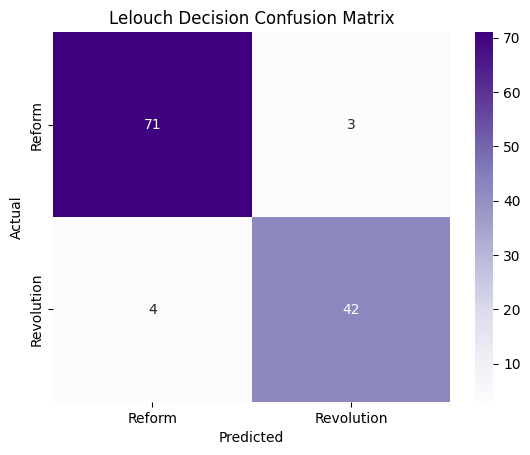

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Reform', 'Revolution'],
            yticklabels=['Reform', 'Revolution'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Lelouch Decision Confusion Matrix")
plt.show()